In [1]:
# Written by Mengzhan Liufu, for real-time simulation with recording E1_124311
# Compare LFP raw data received in real time with Trodes recording file
# Visualize online RMS calculation

# 1 Import packages

In [2]:
import Ipynb_importer

In [4]:
import TrodesReader
# import from https://bitbucket.org/mkarlsso/trodes/src/master/ or pip install trodesnetwork
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
import emkanalysis_clc_toolkit as ct

importing Jupyter notebook from emkanalysis_clc_toolkit.ipynb


In [5]:
lfp_sampling_rate = 1500
lfp_sampling_period = (1/lfp_sampling_rate)*(10**9)

ripple_lower = 150
ripple_upper = 250

# 2 Load data

## 2.1 Import recording data

In [6]:
# 20211207_E1_124311 

data_path_19 = r"C:\Users\mengz\Box\Jhan\ClosedLoopControl Project\DATA\20211207_E1_124311\20211207_E1_124311.LFP_nt20ch1.dat"
data_path_20 = r"C:\Users\mengz\Box\Jhan\ClosedLoopControl Project\DATA\20211207_E1_124311\20211207_E1_124311.LFP_nt20ch1.dat"
data_path_28 = r"C:\Users\mengz\Box\Jhan\ClosedLoopControl Project\DATA\20211207_E1_124311\20211207_E1_124311.LFP_nt28ch1.dat"
data_path_27 = r"C:\Users\mengz\Box\Jhan\ClosedLoopControl Project\DATA\20211207_E1_124311\20211207_E1_124311.LFP_nt27ch1.dat"
data_path_29 = r"C:\Users\mengz\Box\Jhan\ClosedLoopControl Project\DATA\20211207_E1_124311\20211207_E1_124311.LFP_nt29ch1.dat"
time_path = r"C:\Users\mengz\Box\Jhan\ClosedLoopControl Project\DATA\20211207_E1_124311\20211207_E1_124311.timestamps.dat"

recording_data_19 = TrodesReader.readTrodesExtractedDataFile(data_path_19)
recording_data_20 = TrodesReader.readTrodesExtractedDataFile(data_path_20)
recording_data_27 = TrodesReader.readTrodesExtractedDataFile(data_path_27)
recording_data_28 = TrodesReader.readTrodesExtractedDataFile(data_path_28)
recording_data_29 = TrodesReader.readTrodesExtractedDataFile(data_path_29)
recording_time = TrodesReader.readTrodesExtractedDataFile(time_path)

recording_data_19 = np.array([i[0] for i in recording_data_19['data']])
recording_data_20 = np.array([i[0] for i in recording_data_20['data']])
recording_data_27 = np.array([i[0] for i in recording_data_27['data']])
recording_data_28 = np.array([i[0] for i in recording_data_28['data']])
recording_data_29 = np.array([i[0] for i in recording_data_29['data']])

<string>:69: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.


## 2.2 Convert recording time frame

In [7]:
recording_time_data = ct.convert_time(recording_time)

In [8]:
recording_time_aligned = np.array([(i-recording_time_data[0]) for i in recording_time_data])

In [9]:
# Total recording time should match the file length
print('Maximum timestamp: '+str(recording_time_aligned[-1]))
print('In minutes: '+str(recording_time_aligned[-1]/60))

Maximum timestamp: 2374.9626666666663
In minutes: 39.5827111111111


## 2.3 Import simulation data

In [10]:
simulation_raw_path = r'C:\Users\mengz\Box\Jhan\ClosedLoopControl Project\DATA\raw_E1_01.txt'
simulation_rms_path = r'C:\Users\mengz\Box\Jhan\ClosedLoopControl Project\DATA\rms_E1_01.txt'

with open(simulation_raw_path, 'r') as f1:
    raw_file = f1.readlines()
with open(simulation_rms_path, 'r') as f2:
    rms_file = f2.readlines()

In [11]:
simulation_raw_data = None
for i in range(0, len(raw_file)-1, 2):
    current_line = raw_file[i][1:]
    current_list = np.array([float(i[:-1]) for i in list(current_line.split())])
    if i==0:
        simulation_raw_data = current_list
    else:
        simulation_raw_data = np.vstack([simulation_raw_data, current_list])

In [12]:
print(simulation_raw_data[:10])

[[-1233.   -20.   217.  -388.  -506.]
 [-2132.   -12.   355.  -466.  -691.]
 [-3033.   -15.   489.  -588.  -838.]
 [-3552.   -24.   566.  -696.  -887.]
 [-3803.    -9.   597.  -751.  -880.]
 [-3856.    12.   608.  -818.  -868.]
 [-3754.    27.   612.  -838.  -852.]
 [-3601.    26.   635.  -738.  -835.]
 [-3439.    11.   695.  -625.  -828.]
 [-3325.   -15.   760.  -591.  -806.]]


In [13]:
simulation_raw_time_start = int(raw_file[1])
simulation_raw_time = np.array([(int(raw_file[i])-simulation_raw_time_start)*10**(-9) for i in range(1, len(raw_file), 2)])

<IPython.core.display.Javascript object>


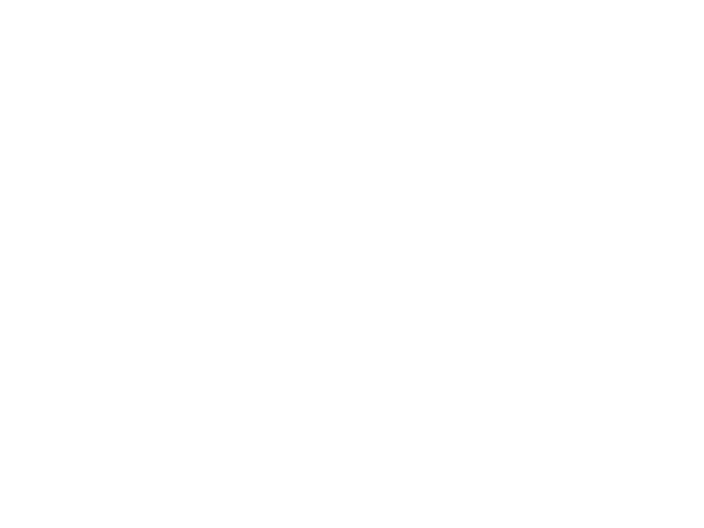

In [14]:
%matplotlib notebook
# See if timestamps are uniformly spaced out
plt.plot(simulation_raw_time[:300])

In [15]:
simulation_rms_data = None
for i in range(0, len(rms_file)-1, 2):
    current_line = rms_file[i][1:]
    current_list = np.array([float(i[:-1]) for i in list(current_line.split())])
    if i==0:
        simulation_rms_data = current_list
    else:
        simulation_rms_data = np.vstack([simulation_rms_data, current_list])

In [16]:
simulation_rms_time = np.array([(int(rms_file[i])-simulation_raw_time_start)*10**(-9) for i in range(1, len(rms_file), 2)])

In [17]:
print('Maximum simulation timestamp: '+str(simulation_rms_time[-1]))
print('In minutes: '+str(simulation_rms_time[-1]/60))

Maximum simulation timestamp: 2502.317708118
In minutes: 41.705295135300005


# 3 Speed analysis

In [18]:
simulation_rms_interval = np.array([(simulation_rms_time[i]-simulation_rms_time[i-1])*10**3 \
                                   for i in range(1, len(simulation_rms_time))])

<IPython.core.display.Javascript object>


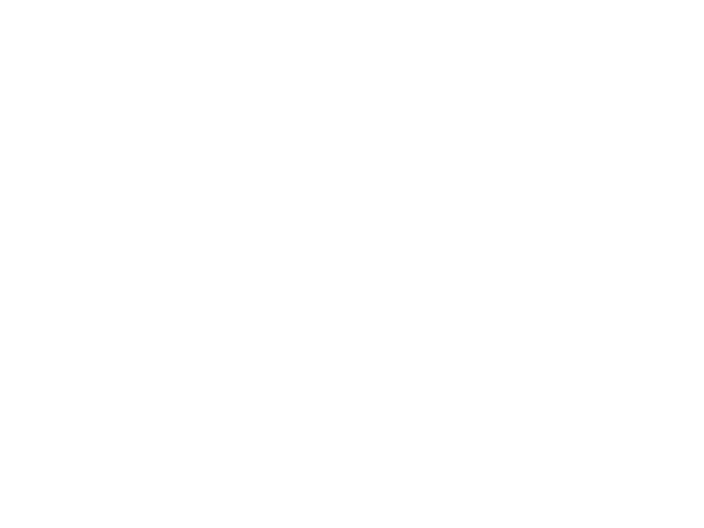

In [19]:
%matplotlib notebook
# Since the system timestamps are unreliable, the lag calculation here doesn't mean anything
diffbar_rms, binedges_rms = np.histogram(simulation_rms_interval, range(0, 40))
plt.figure()
plt.bar(binedges_rms[:-1],diffbar_rms)
plt.title('RMS Update Interval')
plt.xlabel('Update Interval (ms)')
plt.show()

In [20]:
simulation_raw_interval = np.array([(simulation_raw_time[i]-simulation_raw_time[i-1])*(10**3) \
                                    for i in range(1, len(simulation_raw_time))])

<IPython.core.display.Javascript object>


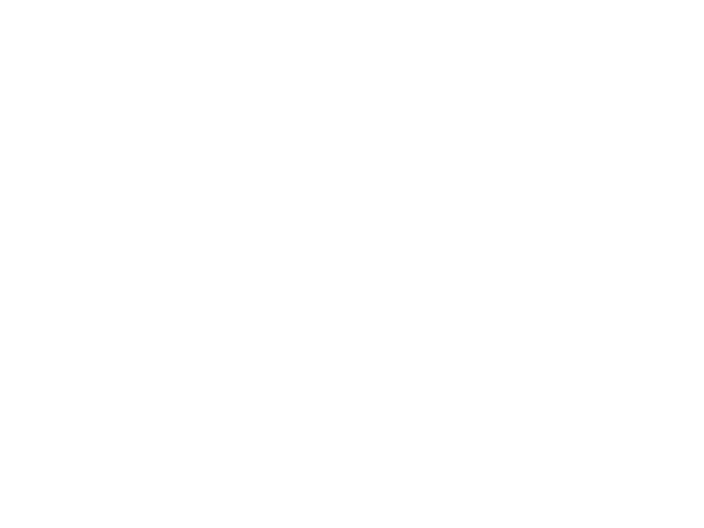

In [21]:
%matplotlib notebook
diffbar_raw, binedges_raw = np.histogram(simulation_raw_interval, range(0, 20))
plt.figure()
plt.bar(binedges_raw[:-1], diffbar_raw)
plt.title('LFP Buffer Update Interval')
plt.xlabel('Update Interval (ms)')
plt.show()

# 4 Compare recording & simulation

<IPython.core.display.Javascript object>


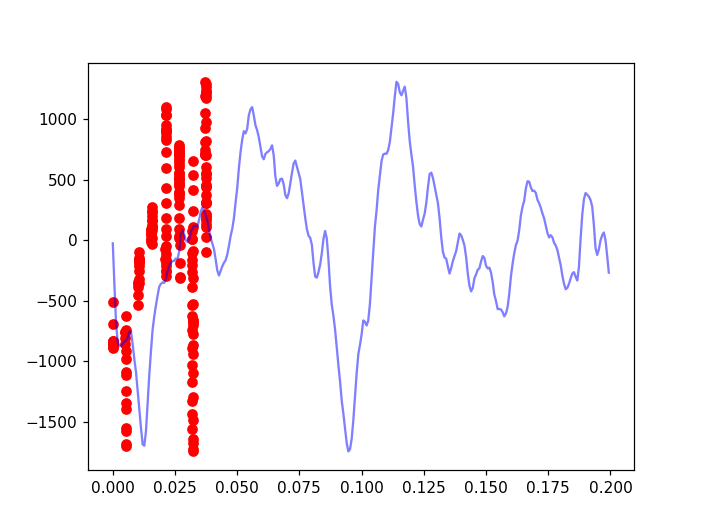

In [25]:
%matplotlib notebook

plt.figure()
plt.plot(recording_time_aligned[0:300], recording_data_29[0:300], color='b', alpha=0.5)
plt.scatter(simulation_raw_time[:200], simulation_raw_data[:200, 4], color='r')

<IPython.core.display.Javascript object>


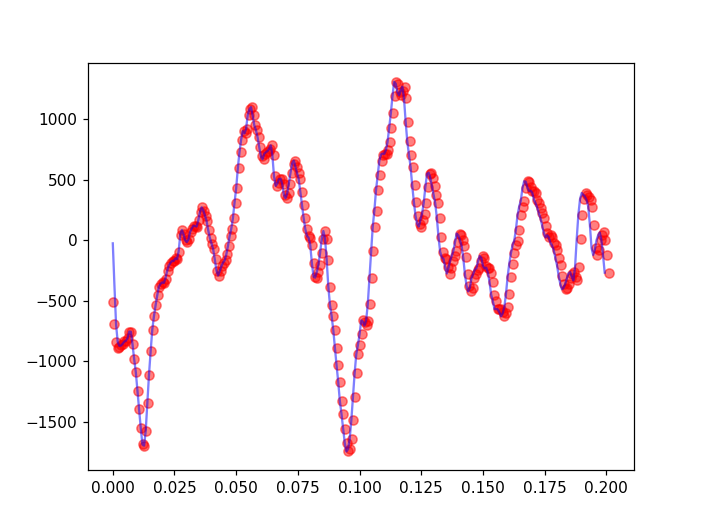

In [26]:
%matplotlib notebook
# If we plot the raw LFP data against the timestamps noted down, the shape looks right but it's squeezed and translated. 
# that may be because the data themselves are fine but timestamps are problematic (a lot of data points packed up, the time
# stamps don't actually match)

# plot data points and assume they are equally spaced out (don't know the real frequency; need adjustment)
# theoretical sampling rate: 1500Hz --> period: 0.67 ms
plt.figure()
plt.plot(recording_time_aligned[0:300], recording_data_29[0:300], color='b', alpha=0.5)
plt.scatter(np.linspace(0, 0.67*(10**-3)*300, num=300), simulation_raw_data[0:300,4], color='r', alpha=0.5)
# validate that the raw data received is fine

In [27]:
# calculate RMS offline, to compare with online RMS
ripple_data_28 = ct.bandpass_filter('butterworth', recording_data_28, lfp_sampling_rate, 1, ripple_lower, ripple_upper) 
offline_rms_processing_results_28 = ct.offline_rms_processing(recording_time_aligned[:1500*10], \
                                                              150, 300, ripple_data_28[:1500*10])
offline_rms_magnitude_28 = offline_rms_processing_results_28[0]
offline_rms_time_28 = offline_rms_processing_results_28[1]

<IPython.core.display.Javascript object>


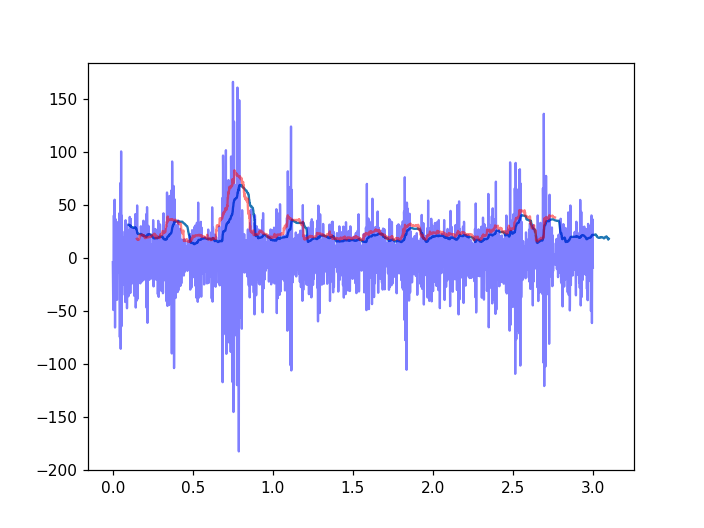

In [38]:
%matplotlib notebook
# the pattern looks right, but also squeezed and translated
# the timestamps of RMS are probably wrong too, so we also try guessing different frequency
# test with three seconds' data

plt.figure()
plt.plot(offline_rms_time_28[:1500*3], offline_rms_magnitude_28[:1500*3]) # 1500 samples per second, plot for 3 seconds
plt.plot(recording_time_aligned[:1500*3], ripple_data_28[:1500*3], color='b', alpha=0.5)
# +0.15 translates the online data to the right (align the start of online and offline RMS)
plt.plot(np.linspace(0,1,num=int(1/0.00067))*(0.81/0.31)+0.15, simulation_rms_data[:int(1/0.00067), 3], color='r', alpha=0.5)